In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).3

## Notebook Overview:

2. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression
## Dataset and Problem Description
In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.
This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

## Exercise Description: Energy Efficiency Prediction with Neural Networks
In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y2 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 

**To complete this exercise, you will write code to build and train neural networks for this problem:**

2. Split the dataset into training, validation, and test sets, using a 70:25:25 ratio.

2. Using numpy, build a neural network that takes in the energy efficiency features as input and predicts the heating load as output. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.002 and 0.0002.
To choose the best network configuration and assess its performance you will:

2. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__

**Important:**
* Train for 50 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.

### Coding my Neural Network:

#### Useful Functions:

In [223]:
def create_W_list(dim_input, dim_output, dim_hidden, layers, random_state=42):
    np.random.seed(random_state)
    W_list = []
    for i in range(layers):
        # Determine input and output sizes for the current layer
        if i == 0:
            fan_in = dim_input + 1  # Input layer includes bias
            fan_out = dim_hidden
        elif i == layers - 1:
            fan_in = dim_hidden + 1  # Output layer includes bias
            fan_out = dim_output
        else:
            fan_in = dim_hidden + 1  # Hidden layers include bias
            fan_out = dim_hidden
        
        # Xavier initialization: scale = sqrt(2 / (fan_in + fan_out))
        scale = np.sqrt(2.0 / (fan_in + fan_out))
        # Generate weights from normal distribution with mean 0 and scaled standard deviation
        if i == 0:
            W = np.random.normal(0, scale, (fan_in, fan_out))
        elif i == layers - 1:
            W = np.random.normal(0, scale, (fan_in, fan_out))
        else:
            W = np.random.normal(0, scale, (fan_in, fan_out))
        W_list.append(W)
    return W_list


def RMSE_foward_pass(y_pred, y_target):
    if (type(y_target) == pd.core.frame.DataFrame):
        y_target = np.array(y_target)

    dif = y_pred - y_target
    dif_squared = dif * dif
    RMSE = (dif_squared.sum() / dif_squared.size) ** (1 / 2)

    return RMSE


def relu_activation(z):
    return np.maximum(0, z)

def relu_inverted(z):
    return np.where(z > 0, 1, 0)


def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_inverted(z):
    sig = sigmoid_activation(z)
    return sig*(1 - sig)


def identity(z):
    return z

def standardize(X, mean=None, std=None):
    X = np.array(X, dtype=float)
    if mean is None or std is None:
        mean = np.mean(X, axis=0)  # Per feature
        std = np.std(X, axis=0)
        std = np.where(std == 0, 1, std)  # Avoid division by zero
    X_scaled = (X - mean) / std
    return X_scaled, mean, std
    

#### Reading and Preparing: 

In [224]:
# Reading the csv file:
energy_df = pd.read_csv("energy_efficiency.csv")

X1 = energy_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = energy_df[['Y1', 'Y2']]
#Y1 = energy_df[['Y1']]


In [225]:
# Slipting train/validation/test
random_state = 9
X_train1, X_vt1, Y_train1, Y_vt1 = train_test_split(X1, Y1, test_size=0.3, random_state=random_state)
X_test1, X_validation1, Y_test1, Y_validation1 = train_test_split(X_vt1, Y_vt1, test_size=0.5, random_state=random_state)

print(f"Training Size: {len(X_train1) / len(X1)}")
print(f"Validation Size: {len(X_validation1) / len(X1)}")
print(f"Test Size: {len(X_test1) / len(X1)}")

X_train1_scaled, train_mean, train_std = standardize(X_train1)
Y_train1_scaled, Y_mean, Y_std = standardize(Y_train1)
X_validation1_scaled, _, _ = standardize(X_validation1, mean=train_mean, std=train_std)
Y_validation1_scaled, _, _ = standardize(Y_validation1, mean=Y_mean, std=Y_std)

X_train_set1 = np.concatenate((X_train1, X_validation1))
Y_train_set1 = np.concatenate((Y_train1, Y_validation1))

X_train_set1_scaled, _, _ = standardize(X_train_set1, mean=train_mean, std=train_std)
Y_train_set1_scaled, _, _ = standardize(Y_train_set1, mean=Y_mean, std=Y_std)
X_test1_scaled, _, _ = standardize(X_test1, mean=train_mean, std=train_std)
Y_test1_scaled, _, _ = standardize(Y_test1, mean=Y_mean, std=Y_std)



Training Size: 0.69921875
Validation Size: 0.15104166666666666
Test Size: 0.14973958333333334


#### Foward Pass:

In [226]:
def fowardPass(X, W_list, activation, outputActivation, X_adjusted=False):
    X_bias = np.array(X, dtype=float)
    if not X_adjusted:
        X_bias = np.c_[X_bias, np.ones(X.shape[0])]

    A_list = []
    Z_list = [X_bias]
    for layer, W in enumerate(W_list[:-1]):
        A = Z_list[layer] @ W # Recebe o Z da última camada e a matriz W da camada atual
        Z = np.c_[activation(A), np.ones(A.shape[0])]
        A_list.append(A)
        Z_list.append(Z)

    A = Z_list[-1] @ W_list[-1]
    Y = outputActivation(A)

    return Y, A_list, Z_list


#### BackPropagation:

In [227]:
def backPropagation(Y, T, W_list, A_list, activation_derived):
    Y = np.array(Y, dtype=float)
    T = np.array(T, dtype=float)

    # Computing the errors 'delta': 
    num_layers = len(W_list)
    Delta_L = Y - T # Delta from the output layer
    Delta_list = [Delta_L]
    for i in range(num_layers - 1):
        index = num_layers - 1 - i
        Delta_index = Delta_list[i] @ W_list[num_layers - 1 - i][:-1,:].T * activation_derived(A_list[index-1])
        Delta_list.append(Delta_index)

    return Delta_list


#### Weight Adjustment:

In [228]:
def weightAdjustment(W_list, Z_list, Delta_list, lmb_list, learning_rate):
    num_layers = len(W_list)
    W_list_updated = []
    for i, W in enumerate(W_list):
        # o indice de W é um abaixo do Delta e o mesmo do Z
        W[:-1, :] -= learning_rate * (Z_list[i].T @ Delta_list[num_layers - 1 - i] + lmb_list[i] * W)[:-1, :] 
        W[-1, :] -= learning_rate * (Z_list[i].T @ Delta_list[num_layers - 1 - i])[-1, :] 
        W_list_updated.append(W)

    return W_list_updated

#### Neural Network:

In [229]:
def Neural_Network(X_train, Y_train, X_validation=None, Y_validation=None, max_iteration=50, learning_rate=0.01, num_hidden_layers=4, dim_hidden=10, activation=sigmoid_activation, activation_output=identity, activation_derived=sigmoid_inverted, lmb=0.1, compute_loss=True, random_state=42, loss_function=RMSE_foward_pass, batch_size=None):
    X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    Y_train = Y_train.to_numpy() if isinstance(Y_train, pd.DataFrame) else Y_train
    if X_validation is not None:
        X_validation = X_validation.to_numpy() if isinstance(X_validation, pd.DataFrame) else X_validation
    if Y_validation is not None:
        Y_validation = Y_validation.to_numpy() if isinstance(Y_validation, pd.DataFrame) else Y_validation
    if batch_size == None:
        batch_size = X_train.shape[0]

    layers = num_hidden_layers + 2
    dim_input = X_train.shape[1]
    dim_output = Y_train.shape[1]
    W_list = create_W_list(dim_input, dim_output, dim_hidden, layers,random_state=random_state)
    lmb_list = np.ones(layers) * lmb
    if compute_loss:
        loss_train_list=[]
        loss_validation_list=[]
    
    for iteration in range(max_iteration):
        indices = np.random.permutation(X_train.shape[0])
        for start in range(0, X_train.shape[0], batch_size):
            batch_indices = indices[start:start + batch_size]
            X_batch = X_train[batch_indices]
            Y_batch = Y_train[batch_indices]
            Y_pred, A_list, Z_list = fowardPass(X_batch, W_list, activation, activation_output)
            Delta_list = backPropagation(Y_pred, Y_batch, W_list, A_list, activation_derived)
            W_list = weightAdjustment(W_list, Z_list, Delta_list, lmb_list, learning_rate)
        
        Y_pred_training, _, _ = fowardPass(X_train, W_list, activation, activation_output)
        if compute_loss:
            loss_train_list.append(loss_function(Y_pred_training,Y_train))
            if (X_validation is not None and Y_validation is not None):
                Y_pred_validation, _, _ = fowardPass(X_validation, W_list, activation, activation_output)
                loss_validation_list.append(loss_function(Y_pred_validation, Y_validation))
        
    if compute_loss:
        return W_list, loss_train_list, loss_validation_list
    else:
        return W_list

#### Testing:

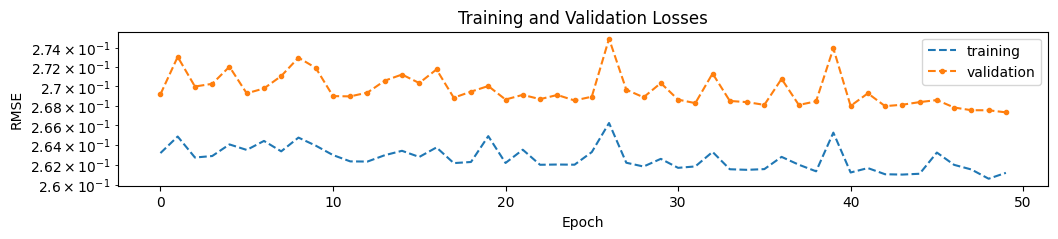

In [230]:
W_list, RMSE_train_list, RMSE_validation_list = Neural_Network(
                                                              X_train1, Y_train1, 
                                                              X_validation=X_validation1, Y_validation=Y_validation1, 
                                                              max_iteration=50, learning_rate=0.01, 
                                                              lmb=0.001, num_hidden_layers=2, dim_hidden=3,
                                                              activation=sigmoid_activation, activation_derived=sigmoid_inverted,
                                                              activation_output=identity, random_state=10, batch_size=1
                                                              ) 
plt.figure(figsize=(12,2))
plt.plot(RMSE_train_list,'--', label='training')
plt.plot(RMSE_validation_list, '.--', label='validation')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

### Choosing the best hyperparameters

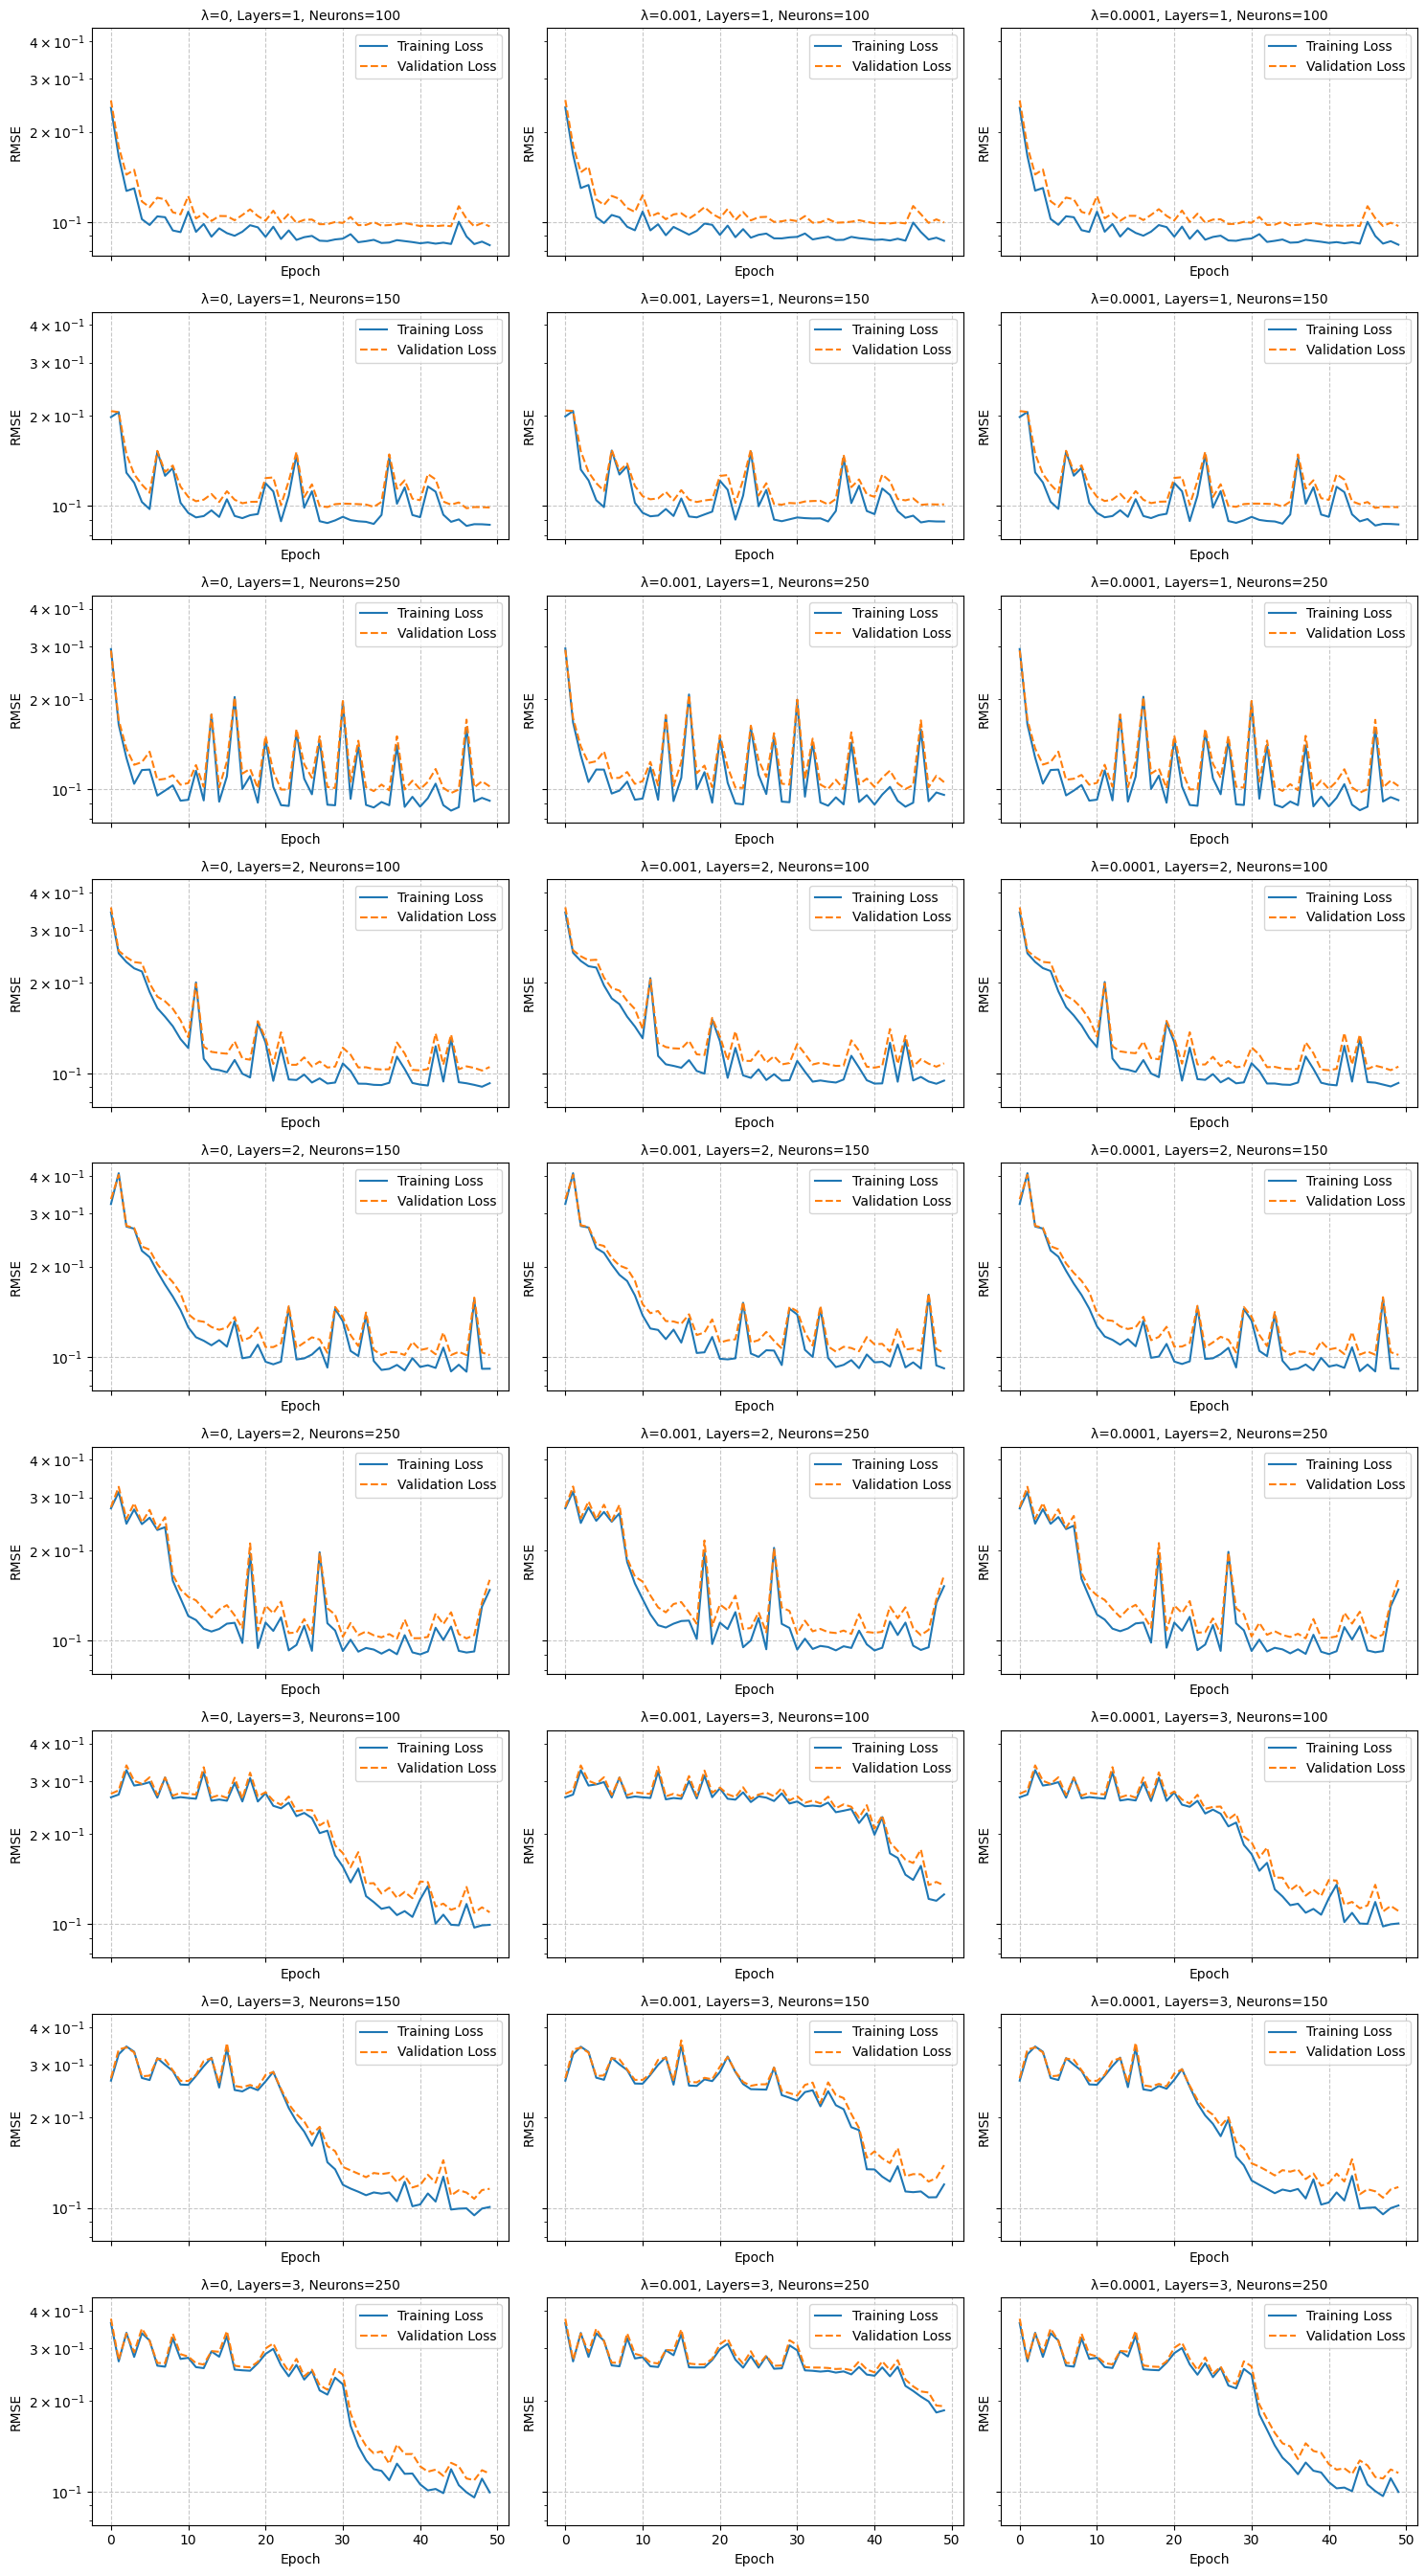

Progress: 33%
Progress: 66%
Progress: 100%


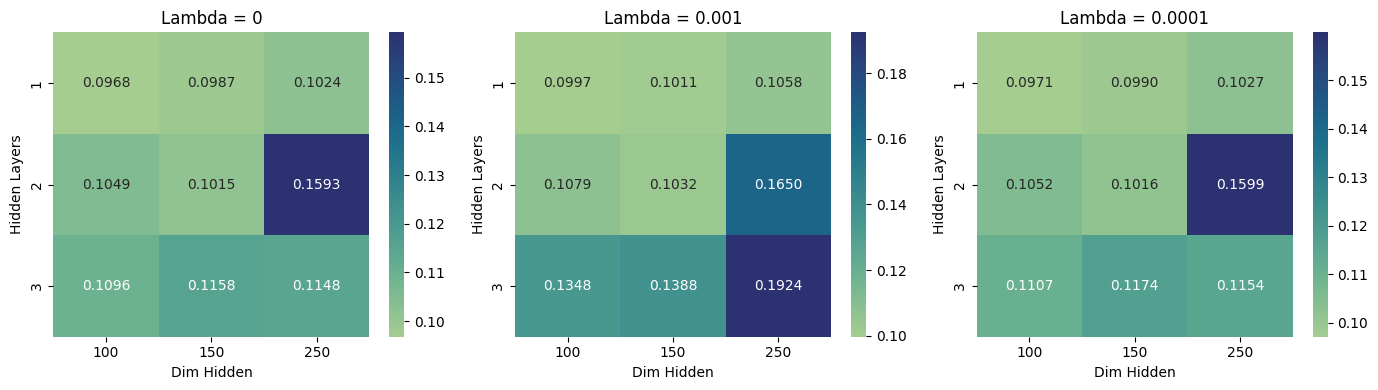

----------
lambda=0, hidden layers=1, dim_hidden=100, RMSE=0.09681247816
lambda=0.001, hidden layers=1, dim_hidden=100, RMSE=0.09973253875
lambda=0.0001, hidden layers=1, dim_hidden=100, RMSE=0.09709186465
__________
                    | Lambda: 0
Best Configuration: | hidden_layers: 1
                    | best hidden_dimension: 100
----------


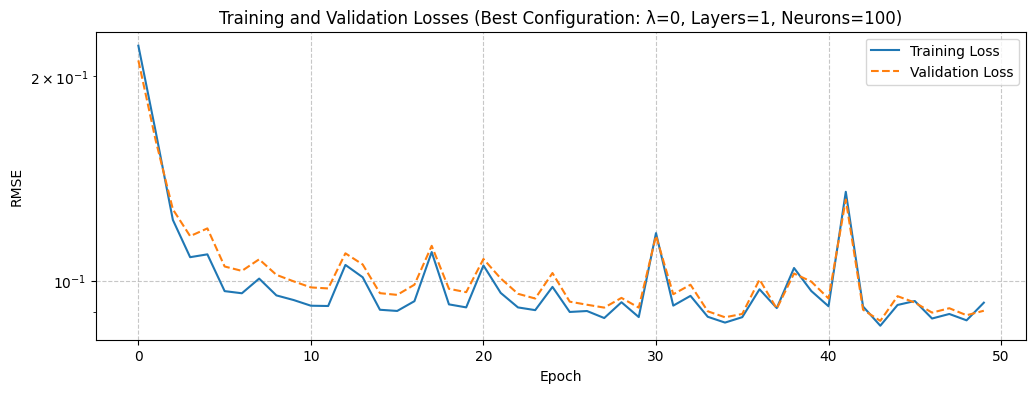

RMSE for Test Set: 0.0904


In [256]:
max_iteration = 50
learning_rate = 0.01
batch_size = 1
activation = sigmoid_activation
activation_derived = sigmoid_inverted

# Define configurations
lmbda_list = [0, 0.001, 0.0001]  # Corrected λ values
num_hidden_layers_list = [1, 2, 3]
dim_hidden_list = [100, 150, 250]

# Initialize storage for heatmap data and best configurations
min_list = []
best_config = []
rmse_data = []  # Store RMSE data for heatmaps

# Create a figure for loss subplots: 9 rows (3 layers × 3 neurons), 3 columns (one per λ)
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 27), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for easier indexing

for lmb_idx, lmb in enumerate(lmbda_list):
    data = np.zeros((len(num_hidden_layers_list), len(dim_hidden_list)))  # Heatmap data
    for y, num_hidden in enumerate(num_hidden_layers_list):
        for x, dim_hidden in enumerate(dim_hidden_list):
            # Train the network and get loss lists
            W_list, RMSE_train_list, RMSE_validation_list = Neural_Network(
                X_train1_scaled, Y_train1,
                X_validation=X_validation1_scaled, Y_validation=Y_validation1,
                max_iteration=max_iteration, learning_rate=learning_rate,
                lmb=lmb, num_hidden_layers=num_hidden, dim_hidden=dim_hidden,
                activation=activation, activation_derived=activation_derived,
                activation_output=identity, compute_loss=True, batch_size=batch_size
            )
            # Compute validation RMSE for heatmap
            Y_pred_validation, _, _ = fowardPass(X_validation1_scaled, W_list, sigmoid_activation, identity)
            rmse = RMSE_foward_pass(Y_pred_validation, Y_validation1)
            data[y, x] = rmse

            # Plot loss curves in the corresponding subplot
            subplot_idx = lmb_idx + (y * len(dim_hidden_list) + x) * 3
            axes[subplot_idx].plot(RMSE_train_list, '-', label='Training Loss')
            axes[subplot_idx].plot(RMSE_validation_list, '--', label='Validation Loss')
            axes[subplot_idx].set_yscale('log')
            axes[subplot_idx].set_title(f'λ={lmb}, Layers={num_hidden}, Neurons={dim_hidden}', fontsize=10)
            axes[subplot_idx].set_xlabel('Epoch')
            axes[subplot_idx].set_ylabel('RMSE')
            axes[subplot_idx].grid(True, linestyle='--', alpha=0.7)  # Add grid for readability
            axes[subplot_idx].legend()

    rmse_data.append(data)  # Store for heatmap
    min_rmse = np.min(data)
    min_idx = np.unravel_index(np.argmin(data), data.shape)
    min_list.append(min_rmse)
    best_config.append({
        'lmbda': lmb,
        'num_hidden_layers': num_hidden_layers_list[min_idx[0]],
        'dim_hidden': dim_hidden_list[min_idx[1]],
        'rmse': min_rmse
    })

# Adjust layout and display
plt.tight_layout()
plt.show()

# Plot heatmaps using stored RMSE data
plt.figure(figsize=(14, 4))
for index, lmb in enumerate(lmbda_list):
    plt.subplot(1, 3, index + 1)
    plt.title(f'Lambda = {lmb}')
    sns.heatmap(rmse_data[index], xticklabels=dim_hidden_list, yticklabels=num_hidden_layers_list, annot=True, cmap="crest", fmt='.4f')
    plt.xlabel('Dim Hidden')
    plt.ylabel('Hidden Layers')
    print(f"Progress: {int((index + 1) / len(lmbda_list) * 100)}%")

plt.tight_layout()
plt.show()

# Print best configurations
best_lmb_index = min_list.index(min(min_list))
best_lmb = lmbda_list[best_lmb_index]
best_dim_hidden = best_config[best_lmb_index]['dim_hidden']
best_num_hidden_layers = best_config[best_lmb_index]['num_hidden_layers']

print("-" * 10)
for config in best_config:
    print(f"lambda={config['lmbda']}, hidden layers={config['num_hidden_layers']}, "
          f"dim_hidden={config['dim_hidden']}, RMSE={config['rmse']:.11f}")
print("_" * 10)
print(f"                    | Lambda: {best_lmb}")
print(f"Best Configuration: | hidden_layers: {best_num_hidden_layers}")
print(f"                    | best hidden_dimension: {best_dim_hidden}")
print("-" * 10)

# Final evaluation on test set with best configuration
W_list, RMSE_training_list, RMSE_validation_list = Neural_Network(
    X_train_set1_scaled, Y_train_set1,
    X_validation=X_test1_scaled, Y_validation=Y_test1,
    max_iteration=max_iteration, learning_rate=learning_rate,
    lmb=best_lmb, num_hidden_layers=best_num_hidden_layers, dim_hidden=best_dim_hidden,
    activation=activation, activation_derived=activation_derived,
    activation_output=identity, compute_loss=True, batch_size=batch_size
)
Y_pred_test, _, _ = fowardPass(X_test1_scaled, W_list, sigmoid_activation, identity)
rmse_test = RMSE_foward_pass(Y_pred_test, Y_test1)

# Plot training and validation losses for best configuration
plt.figure(figsize=(12, 4))
plt.plot(RMSE_training_list, '-', label='Training Loss')
plt.plot(RMSE_validation_list, '--', label='Validation Loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Training and Validation Losses (Best Configuration: λ={best_lmb}, Layers={best_num_hidden_layers}, Neurons={best_dim_hidden})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"RMSE for Test Set: {rmse_test:.4f}")

RMSE for Test: 0.0903747969445136


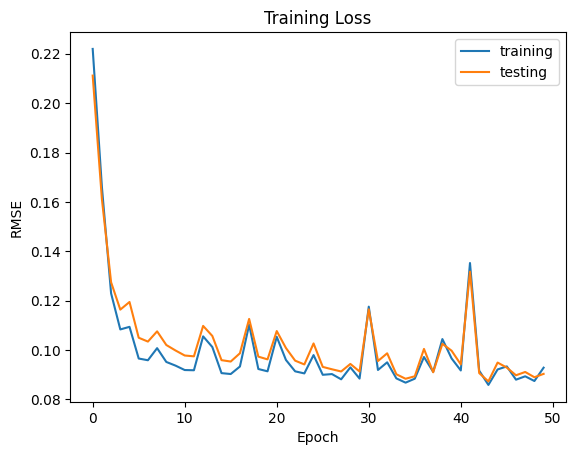

In [257]:
# Calculating the RMSE for the test part:

W_list, RMSE_training_list, RMSE_test_list = Neural_Network(
                        X_train_set1_scaled, Y_train_set1, 
                        X_validation=X_test1_scaled, Y_validation=Y_test1,
                        max_iteration=max_iteration, learning_rate=learning_rate, 
                        lmb=best_lmb, num_hidden_layers=best_num_hidden_layers, dim_hidden=best_dim_hidden,
                        activation=activation, activation_derived=activation_derived,
                        activation_output=identity, compute_loss=True, batch_size=batch_size,
                        )

Y_pred_test, _, _ = fowardPass(X_test1_scaled, W_list, sigmoid_activation, identity)
rmse_test = RMSE_foward_pass(Y_pred_test, Y_test1)
plt.plot(RMSE_training_list,'-', label='training')
plt.plot(RMSE_test_list,'-', label='testing')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training Loss')
plt.legend()
print(f"RMSE for Test: {rmse_test}")
plt.show()




# Classification
## Dataset description: 
This is a dataset from the medical domain. It describes the problem of diagnosing coronary heart disease (CHD) via Traditional Chinese Medicine approaches. Each datapoint corresponds to a patient represented by a set of 49 features corresponding to the presence or absence of different symptoms: feelings cold or warm, sweating, etc. The 6 labels represent presence or absence of specific heart conditions: deficiency of heart qi syndrome, deficiency of heart yang syndrome, deficiency of heart yin syndrome, qi stagnation syndrome, turbid phlegm syndrome, and blood stasis syndrome.

## Exercise Description: CHD49 Multi-Label Classification with Neural Networks
In this exercise, you will build and train a neural network to predict the 6 different labels of CHD (last 6 columns of the dataset). 

**To complete this exercise, follow these steps:**

1. Load the dataset and split it into training, validation, and test sets, using a 70:15:15 ratio. 

2. Build a neural network using numpy that takes in the features as input and predicts the 6 different labels. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using batch gradient descent. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__


**Important:**
* Train for at least 1000 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.


### Reading and Preparing

In [250]:
chd49_df = pd.read_csv('CHD_49.csv')
num_features = 49
num_labels = 6
X2 = chd49_df.iloc[:, :num_features].values.astype(np.float32)
Y2 = chd49_df.iloc[:, -num_labels:].values.astype(np.float32)

In [251]:
random_state = 9
X_train2, X_vt2, Y_train2, Y_vt2 = train_test_split(X2, Y2, test_size=0.3, random_state=random_state)
X_test2, X_validation2, Y_test2, Y_validation2 = train_test_split(X_vt2, Y_vt2, test_size=0.5, random_state=random_state)

print(f"Training Size: {len(X_train2) / len(X2)}")
print(f"Validation Size: {len(X_validation2) / len(X2)}")
print(f"Test Size: {len(X_test2) / len(X2)}")


Training Size: 0.6990990990990991
Validation Size: 0.15135135135135136
Test Size: 0.14954954954954955


### Coding:

In [235]:

def binary_cross_entropy(y_pred, y_true):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def precision_score(y_true, y_pred, threshold=0.5):
    y_pred_binary = (y_pred >= threshold).astype(np.float32)
    n_labels = y_true.shape[1]
    precisions = []
    
    for label in range(n_labels):
        true = y_true[:, label]
        pred = y_pred_binary[:, label]
        
        tp = np.sum((true == 1) & (pred == 1))
        fp = np.sum((true == 0) & (pred == 1))
        
        if tp + fp > 0:
            precision = tp / (tp + fp)
        else:
            precision = 0.0 
        precisions.append(precision)

    return np.mean(precisions)

def f1_score(y_true, y_pred, threshold=0.5):
    y_pred_binary = (y_pred >= threshold).astype(np.float32)
    n_labels = y_true.shape[1]
    f1_scores = []
    
    for label in range(n_labels):
        true = y_true[:, label]
        pred = y_pred_binary[:, label]
        
        tp = np.sum((true == 1) & (pred == 1))
        fp = np.sum((true == 0) & (pred == 1))
        fn = np.sum((true == 1) & (pred == 0))
        
        if tp + fp > 0:
            precision = tp / (tp + fp)
        else:
            precision = 0.0
        if tp + fn > 0:
            recall = tp / (tp + fn)
        else:
            recall = 0.0
            
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0
        f1_scores.append(f1)
    
    return np.mean(f1_scores)

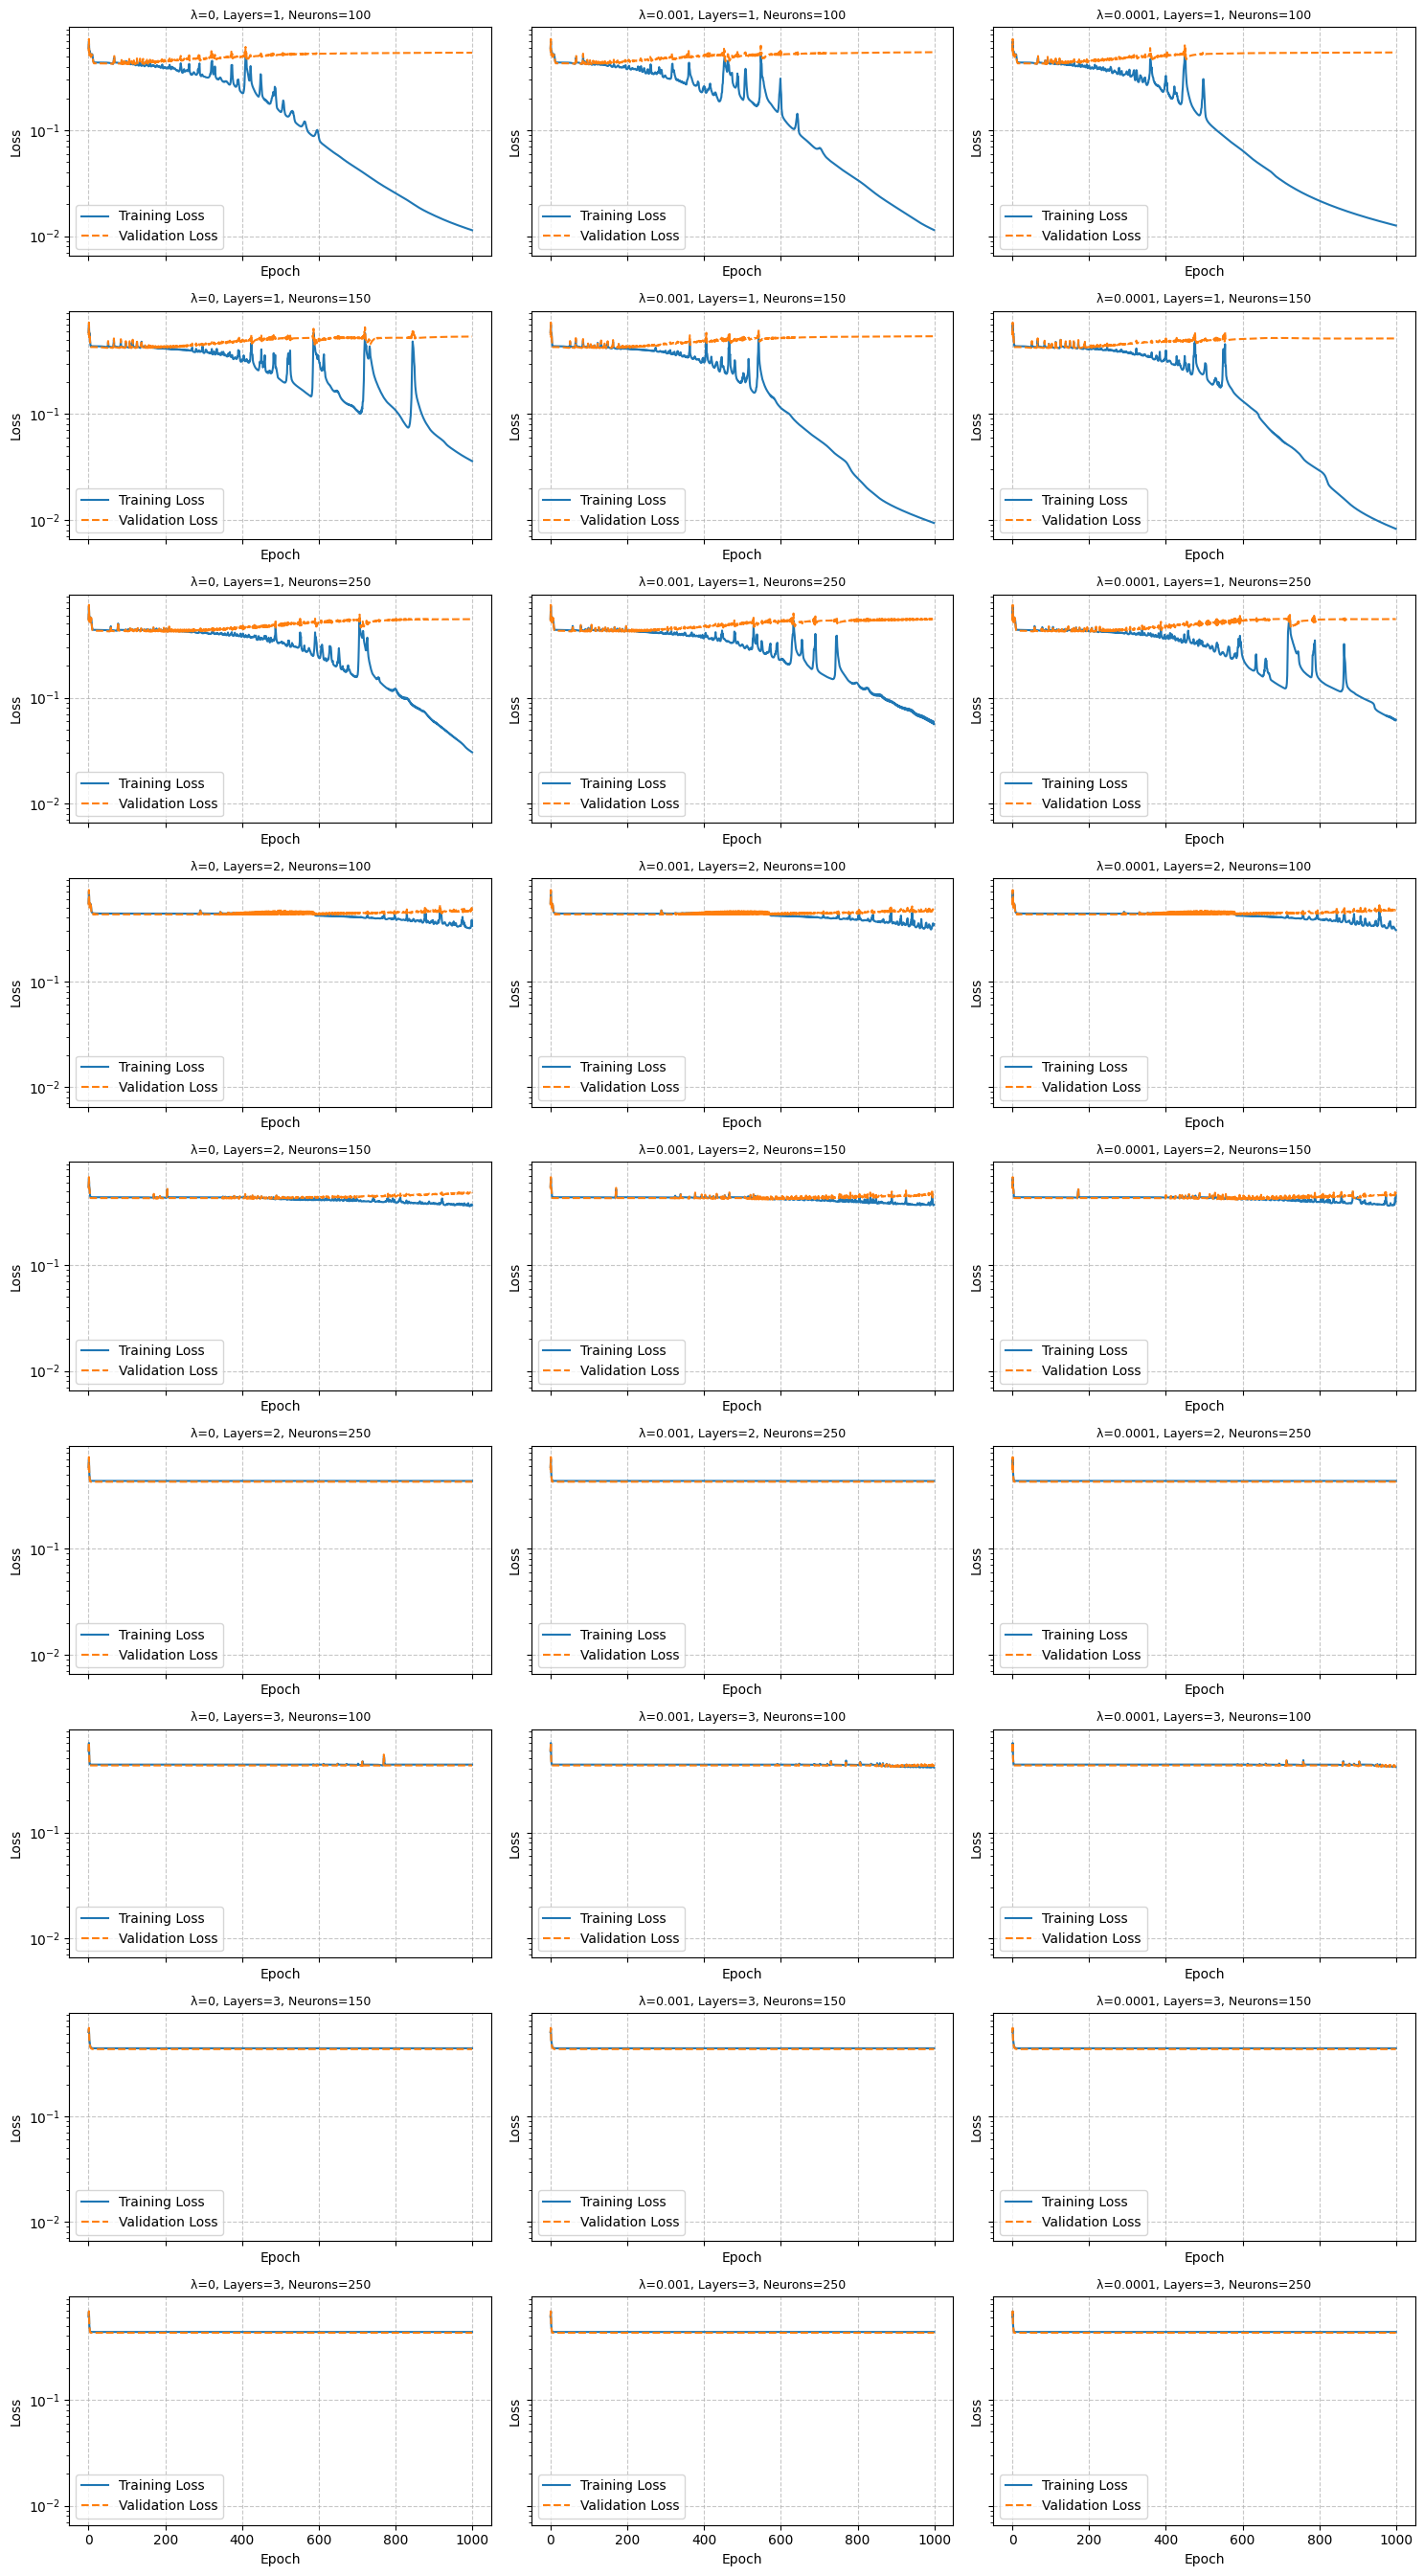

Progress: 33%
Progress: 66%
Progress: 100%


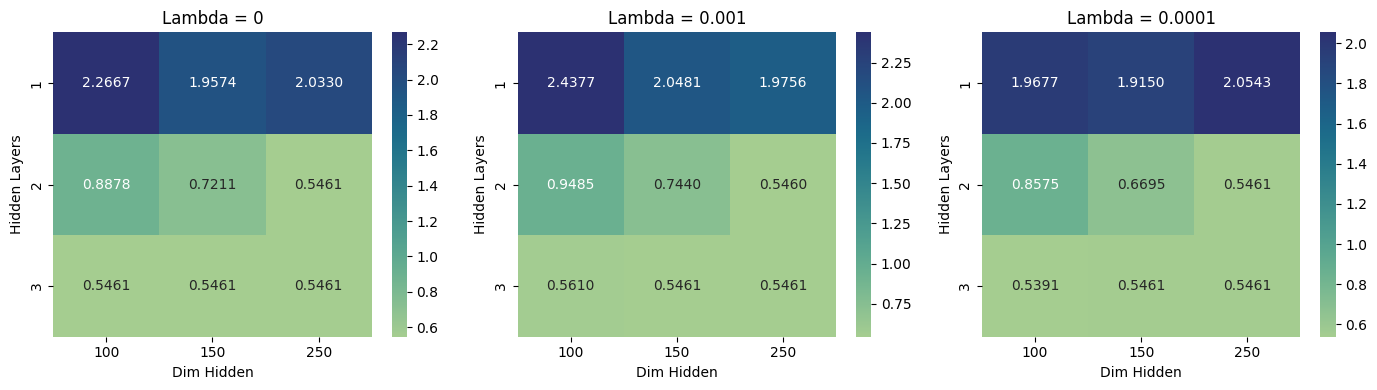

----------
lambda=0, hidden layers=2, dim_hidden=250, Loss=0.54605808935
lambda=0.001, hidden layers=2, dim_hidden=250, Loss=0.54603502171
lambda=0.0001, hidden layers=3, dim_hidden=100, Loss=0.53908343174
__________
                    | Lambda: 0.0001
Best Configuration: | hidden_layers: 3
                    | best hidden_dimension: 100
----------


In [259]:
max_iteration = 1000
learning_rate = 0.01
batch_size = None
activation = sigmoid_activation
activation_derived = sigmoid_inverted
activation_output = sigmoid_activation
loss_function = binary_cross_entropy

# Define configurações
lmbda_list = [0, 0.001, 0.0001]
num_hidden_layers_list = [1, 2, 3]
dim_hidden_list = [100, 150, 250]

min_list = []
best_config = []
loss_data_list = []  # Armazena os losses para os heatmaps

# Subplots para train/validation loss
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 27), sharex=True, sharey=True)
axes = axes.flatten()

for lmb_idx, lmb in enumerate(lmbda_list):
    data = np.zeros((len(num_hidden_layers_list), len(dim_hidden_list)))  # Matriz para heatmap
    for y, num_hidden in enumerate(num_hidden_layers_list):
        for x, dim_hidden in enumerate(dim_hidden_list):
            # Treinamento da rede
            W_list, train_loss_list, validation_loss_list = Neural_Network(
                X_train2, Y_train2,
                X_validation=X_validation2, Y_validation=Y_validation2,
                max_iteration=max_iteration, learning_rate=learning_rate,
                lmb=lmb, num_hidden_layers=num_hidden, dim_hidden=dim_hidden,
                activation=activation, activation_derived=activation_derived,
                activation_output=activation_output, compute_loss=True, batch_size=batch_size
            )

            # Predição final na validação
            Y_pred_validation, _, _ = fowardPass(X_validation2, W_list, activation, activation_output)
            val_loss = loss_function(Y_pred_validation, Y_validation2)
            data[y, x] = val_loss

            # Plot das curvas de loss
            subplot_idx = lmb_idx + (y * len(dim_hidden_list) + x) * len(lmbda_list)
            axes[subplot_idx].plot(train_loss_list, '-', label='Training Loss')
            axes[subplot_idx].plot(validation_loss_list, '--', label='Validation Loss')
            axes[subplot_idx].set_yscale('log')
            axes[subplot_idx].set_title(f'λ={lmb}, Layers={num_hidden}, Neurons={dim_hidden}', fontsize=9)
            axes[subplot_idx].set_xlabel('Epoch')
            axes[subplot_idx].set_ylabel('Loss')
            axes[subplot_idx].grid(True, linestyle='--', alpha=0.7)
            axes[subplot_idx].legend()

    loss_data_list.append(data)
    min_loss = np.min(data)
    min_idx = np.unravel_index(np.argmin(data), data.shape)
    min_list.append(min_loss)
    best_config.append({
        'lmbda': lmb,
        'num_hidden_layers': num_hidden_layers_list[min_idx[0]],
        'dim_hidden': dim_hidden_list[min_idx[1]],
        'loss': min_loss
    })

plt.tight_layout()
plt.show()

# Heatmaps
plt.figure(figsize=(14, 4))
for index, lmb in enumerate(lmbda_list):
    plt.subplot(1, 3, index + 1)
    plt.title(f'Lambda = {lmb}')
    sns.heatmap(loss_data_list[index], xticklabels=dim_hidden_list, yticklabels=num_hidden_layers_list, annot=True, cmap="crest", fmt='.4f')
    plt.xlabel('Dim Hidden')
    plt.ylabel('Hidden Layers')
    print(f"Progress: {int((index + 1) / len(lmbda_list) * 100)}%")

plt.tight_layout()
plt.show()

# Melhor configuração
best_lmb_index = min_list.index(min(min_list))
best_lmb = lmbda_list[best_lmb_index]
best_dim_hidden = best_config[best_lmb_index]['dim_hidden']
best_num_hidden_layers = best_config[best_lmb_index]['num_hidden_layers']

print("-" * 10)
for config in best_config:
    print(f"lambda={config['lmbda']}, hidden layers={config['num_hidden_layers']}, "
          f"dim_hidden={config['dim_hidden']}, Loss={config['loss']:.11f}")
print("_" * 10)
print(f"                    | Lambda: {best_lmb}")
print(f"Best Configuration: | hidden_layers: {best_num_hidden_layers}")
print(f"                    | best hidden_dimension: {best_dim_hidden}")
print("-" * 10)


Loss for Test: 0.5803125181127964


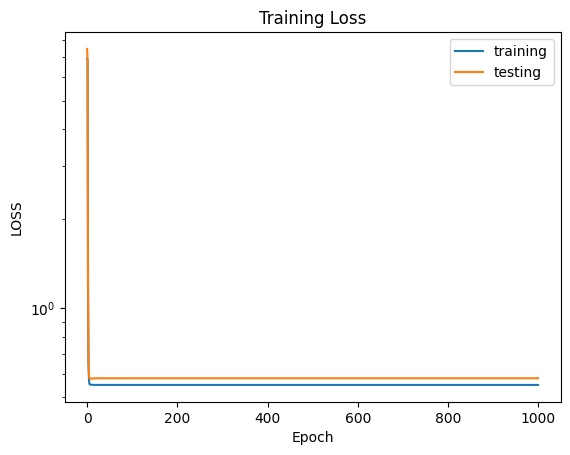

In [ ]:
# Calculating the RMSE for the test part:

X_train_set2 = np.concatenate((X_train2, X_validation2))
Y_train_set2 = np.concatenate((Y_train2, Y_validation2))

W_list, loss_training_list, loss_testing_list = Neural_Network(
                        X_train_set2, Y_train_set2, 
                        X_validation=X_test2, Y_validation=Y_test2,
                        max_iteration=max_iteration, learning_rate=learning_rate, 
                        lmb=best_lmb, num_hidden_layers=best_num_hidden_layers, dim_hidden=best_dim_hidden,
                        activation=activation, activation_derived=activation_derived,
                        activation_output=activation_output, compute_loss=True, batch_size=batch_size, loss_function=loss_function
                        )

Y_pred_test, _, _ = fowardPass(X_test2, W_list, activation=activation, outputActivation=activation_output)
loss_test = binary_cross_entropy(Y_pred_test, Y_test2)
plt.plot(loss_training_list,'-', label='training')
plt.plot(loss_testing_list,'-', label='testing')
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.yscale('log')
plt.title('Training Loss')
plt.legend()
print(f"Loss for Test: {loss_test}")
plt.show()


In [ ]:
roc_score = roc_auc_score(Y_test2, Y_pred_test, average='macro')

print(roc_score)


loss_test = binary_cross_entropy(Y_pred_test, Y_test2)  # Perda sem regularização
precision = precision_score(Y_test2, Y_pred_test, threshold=0.5)
f1 = f1_score(Y_test2, Y_pred_test, threshold=0.5)
roc_score = roc_auc_score(Y_test2, Y_pred_test, average='macro')

# Exibir resultados
print(f"Loss for Test (Binary Cross-Entropy): {loss_test:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"F1-Score (macro): {f1:.4f}")
print(f"ROC AUC (macro): {roc_score:.4f}")

0.5618373929965339
Loss for Test (Binary Cross-Entropy): 0.5803
Precision (macro): 0.2169
F1-Score (macro): 0.2620
ROC AUC (macro): 0.5618


In [253]:

# Testar diferentes limiares
print("\nTestando diferentes limiares para precisão e F1-score:")
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    precision = precision_score(Y_test2, Y_pred_test, threshold=threshold)
    f1 = f1_score(Y_test2, Y_pred_test, threshold=threshold)
    print(f"Threshold {threshold}: Precision={precision:.4f}, F1-Score={f1:.4f}")

# Métricas por rótulo
print("\nMétricas por rótulo (threshold=0.5):")
y_pred_binary = (Y_pred_test >= 0.5).astype(np.float32)
for label in range(num_labels):
    tp = np.sum((Y_test2[:, label] == 1) & (y_pred_binary[:, label] == 1))
    fp = np.sum((Y_test2[:, label] == 0) & (y_pred_binary[:, label] == 1))
    fn = np.sum((Y_test2[:, label] == 1) & (y_pred_binary[:, label] == 0))
    precision = tp / (tp + fp) if tp + fp > 0 else 0.0
    recall = tp / (tp + fn) if tp + fn > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0.0
    print(f"Rótulo {label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")


Testando diferentes limiares para precisão e F1-score:
Threshold 0.3: Precision=0.4177, F1-Score=0.5472
Threshold 0.4: Precision=0.2952, F1-Score=0.3686
Threshold 0.5: Precision=0.2169, F1-Score=0.2620
Threshold 0.6: Precision=0.2169, F1-Score=0.2620
Threshold 0.7: Precision=0.1205, F1-Score=0.1399

Métricas por rótulo (threshold=0.5):
Rótulo 0: Precision=0.5783, Recall=1.0000, F1-Score=0.7328
Rótulo 1: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Rótulo 2: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Rótulo 3: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Rótulo 4: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Rótulo 5: Precision=0.7229, Recall=1.0000, F1-Score=0.8392
